In [1]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from pulearn import (
    MultilayerPerceptron,
    WeightedUnlabelledMultilayerPerceptron,
    UnlabelledExponentialLossMultilayerPerceptron,
    HardBootstrappingMultilayerPerceptron
)

from pulearn.utils import fit_and_plot, synthesize_pu_labels

In [2]:
# Network Parameters
n_input = 2
n_classes = 2

In [10]:
X, y = datasets.make_circles(n_samples=800, noise=0.1, factor=.3, random_state=0)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=42)
Y_train = np.eye(n_classes)[y_train]
print(X_train.shape)
print(Y_train.shape)

(400, 2)
(400, 2)


# Multilayer Perceptron without PU

Using [ 1.  1.]
Epoch: 0001 cost= 0.795690775
Epoch: 0011 cost= 0.453004986
Epoch: 0021 cost= 0.153174222
Epoch: 0031 cost= 0.041720533
Epoch: 0041 cost= 0.017922829
Epoch: 0051 cost= 0.010728866
Epoch: 0061 cost= 0.007389949
Epoch: 0071 cost= 0.005467957
Epoch: 0081 cost= 0.004274810
Epoch: 0091 cost= 0.003439172
Using [ 1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

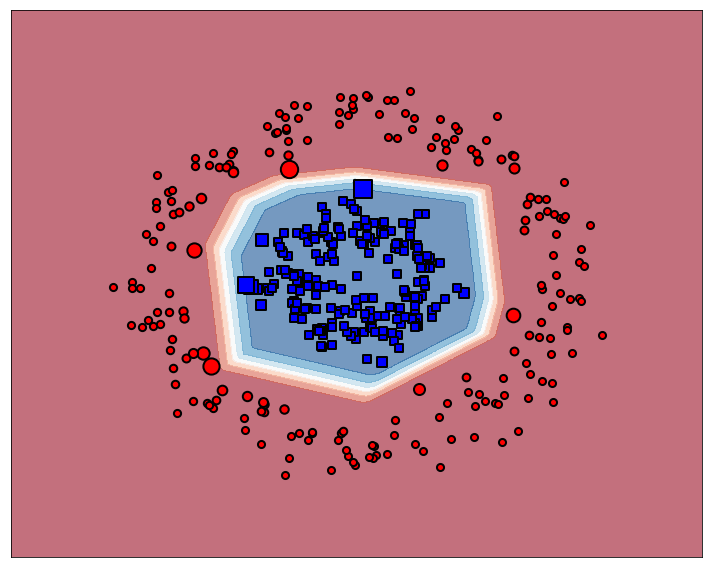

In [11]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          alpha=0,
                          epochs=100,
                          verbose=True)
fit_and_plot(X_train, Y_train, mp, marker_size="loss")

# PU setup

In [28]:
Y_train_pu = synthesize_pu_labels(Y_train, random_state=42)

Using [ 1.  1.]
Epoch: 0001 cost= 2.145475537
Epoch: 0011 cost= 0.547574908
Epoch: 0021 cost= 0.486193456
Epoch: 0031 cost= 0.454936460
Epoch: 0041 cost= 0.425125375
Epoch: 0051 cost= 0.397267960
Epoch: 0061 cost= 0.381252162
Epoch: 0071 cost= 0.374759160
Epoch: 0081 cost= 0.371785417
Epoch: 0091 cost= 0.371133454
Epoch: 0101 cost= 0.369493529
Epoch: 0111 cost= 0.368973508
Epoch: 0121 cost= 0.368992381
Epoch: 0131 cost= 0.368247397
Epoch: 0141 cost= 0.367977276
Epoch: 0151 cost= 0.368443720
Epoch: 0161 cost= 0.367991060
Epoch: 0171 cost= 0.367627501
Epoch: 0181 cost= 0.367770314
Epoch: 0191 cost= 0.367680803
Using [ 1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

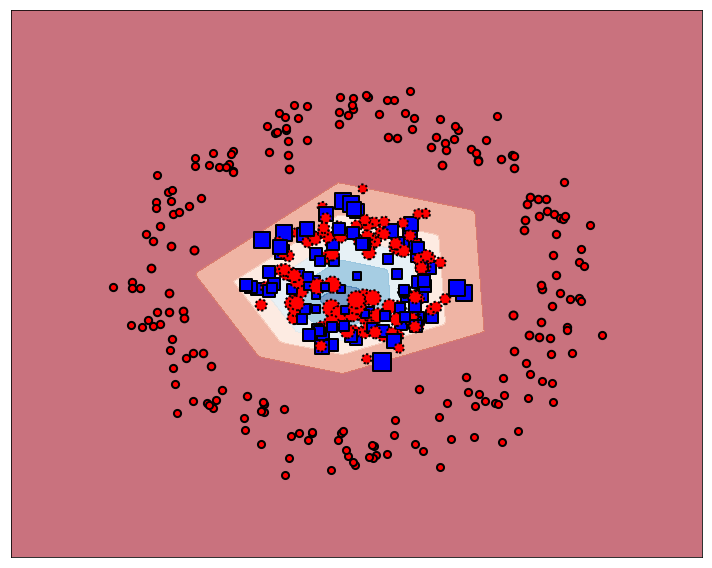

In [29]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=8e-3,
                          alpha=0,
                          epochs=200,
                          class_weight=None,
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss"], Y_true=Y_train)

### balanced learning

Using [ 1.          3.23157895]
Epoch: 0001 cost= 1.222265095
Epoch: 0011 cost= 1.035121709
Epoch: 0021 cost= 0.994255587
Epoch: 0031 cost= 0.911316708
Epoch: 0041 cost= 0.791049778
Epoch: 0051 cost= 0.719763741
Epoch: 0061 cost= 0.661874875
Epoch: 0071 cost= 0.629567340
Epoch: 0081 cost= 0.621167660
Epoch: 0091 cost= 0.618561655
Epoch: 0101 cost= 0.616465598
Epoch: 0111 cost= 0.613409609
Epoch: 0121 cost= 0.612308875
Epoch: 0131 cost= 0.611741409
Epoch: 0141 cost= 0.610900089
Epoch: 0151 cost= 0.611119822
Epoch: 0161 cost= 0.609549776
Epoch: 0171 cost= 0.611798406
Epoch: 0181 cost= 0.609131321
Epoch: 0191 cost= 0.609423339
Using [ 1.          3.23157895]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

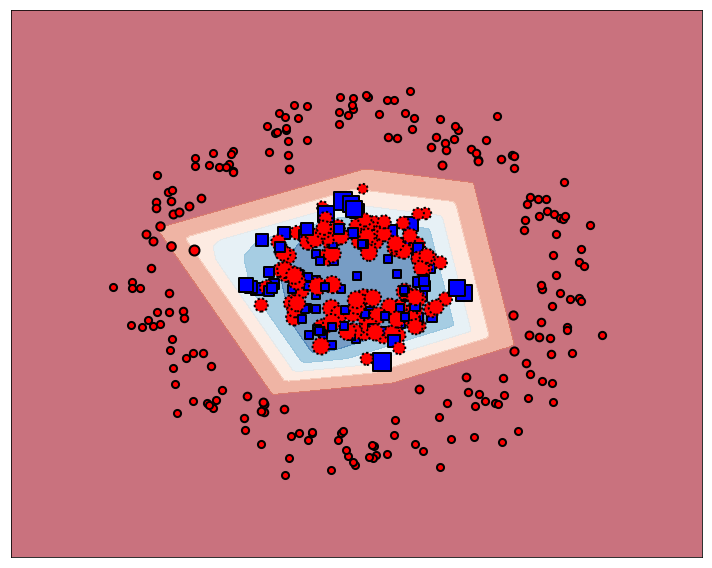

In [17]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss"], Y_true=Y_train)

Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]
Epoch: 0001 cost= 1.455118179
Epoch: 0011 cost= 1.376983315
Epoch: 0021 cost= 1.223288119
Epoch: 0031 cost= 1.079553246
Epoch: 0041 cost= 0.986825302
Epoch: 0051 cost= 0.917392880
Epoch: 0061 cost= 0.869482011
Epoch: 0071 cost= 0.844095260
Epoch: 0081 cost= 0.834655240
Epoch: 0091 cost= 0.825634569
Epoch: 0101 cost= 0.821512908
Epoch: 0111 cost= 0.819159687
Epoch: 0121 cost= 0.816901416
Epoch: 0131 cost= 0.816197276
Epoch: 0141 cost= 0.813697636
Epoch: 0151 cost= 0.810042962
Epoch: 0161 cost= 0.804994598
Epoch: 0171 cost= 0.802497655
Epoch: 0181 cost= 0.800947428
Epoch: 0191 cost= 0.791772485
Epoch: 0201 cost= 0.792597577
Epoch: 0211 cost= 0.789692804
Epoch: 0221 cost= 0.791155010
Epoch: 0231 cost= 0.792700127
Epoch: 0241 cost= 0.789710239
Epoch: 0251 cost= 0.784236655
Epoch: 0261 cost= 0.788072526
Epoch: 0271 cost= 0.787188634
Epoch: 0281 cost= 0.783622697
Epoch: 0291 cost= 0.786162406
Using [ 1.          3.23157

<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

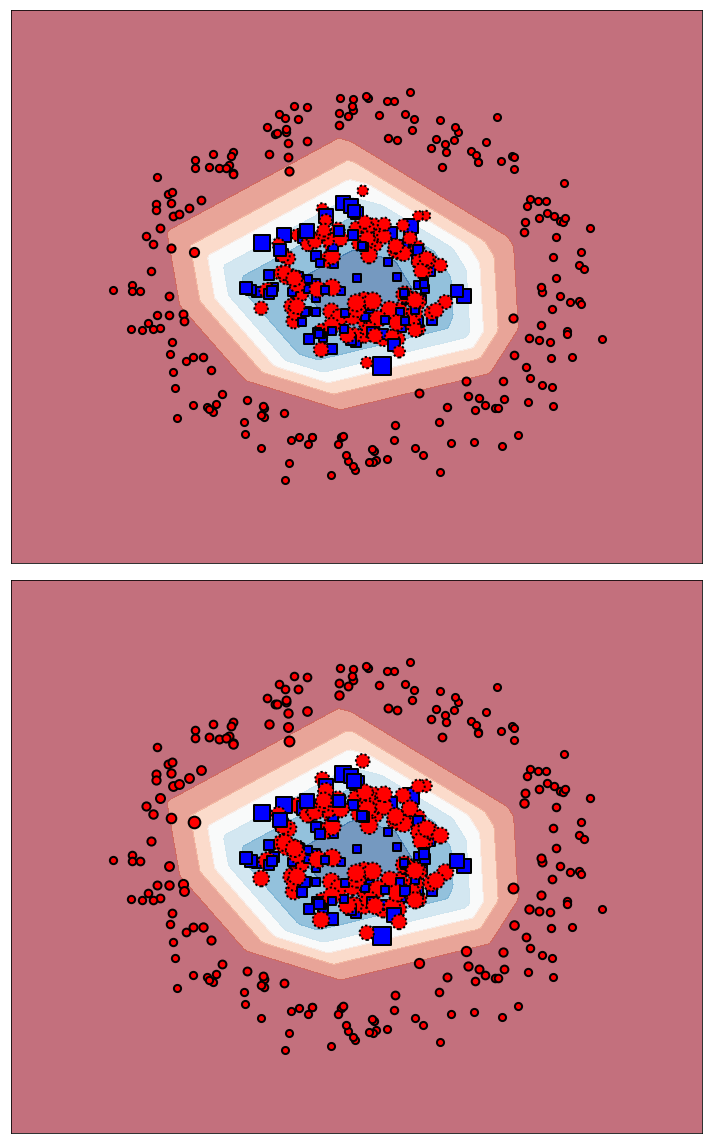

In [38]:
mp = WeightedUnlabelledMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=300,
                          class_weight="balanced",
                          unlabelled_weight={0:0.5, 1:1},
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss", "gradient"], Y_true=Y_train)

Using [ 1.          3.23157895]
Epoch: 0001 cost= 0.753369704
Epoch: 0011 cost= 0.675286159
Epoch: 0021 cost= 0.536697745
Epoch: 0031 cost= 0.436654553
Epoch: 0041 cost= 0.330985419
Epoch: 0051 cost= 0.289191827
Epoch: 0061 cost= 0.275850449
Epoch: 0071 cost= 0.269332431
Epoch: 0081 cost= 0.265616171
Epoch: 0091 cost= 0.263579138
Epoch: 0101 cost= 0.262253910
Epoch: 0111 cost= 0.261312004
Epoch: 0121 cost= 0.260582794
Epoch: 0131 cost= 0.260031376
Epoch: 0141 cost= 0.259605262
Epoch: 0151 cost= 0.259266652
Epoch: 0161 cost= 0.258944277
Epoch: 0171 cost= 0.258686718
Epoch: 0181 cost= 0.258417856
Epoch: 0191 cost= 0.258158308
Epoch: 0201 cost= 0.257894635
Epoch: 0211 cost= 0.257632568
Epoch: 0221 cost= 0.257258143
Epoch: 0231 cost= 0.256959431
Epoch: 0241 cost= 0.256460454
Epoch: 0251 cost= 0.256139196
Epoch: 0261 cost= 0.255767863
Epoch: 0271 cost= 0.255431358
Epoch: 0281 cost= 0.255138215
Epoch: 0291 cost= 0.254686717
Epoch: 0301 cost= 0.254522584
Epoch: 0311 cost= 0.254145276
Epoch: 0

<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

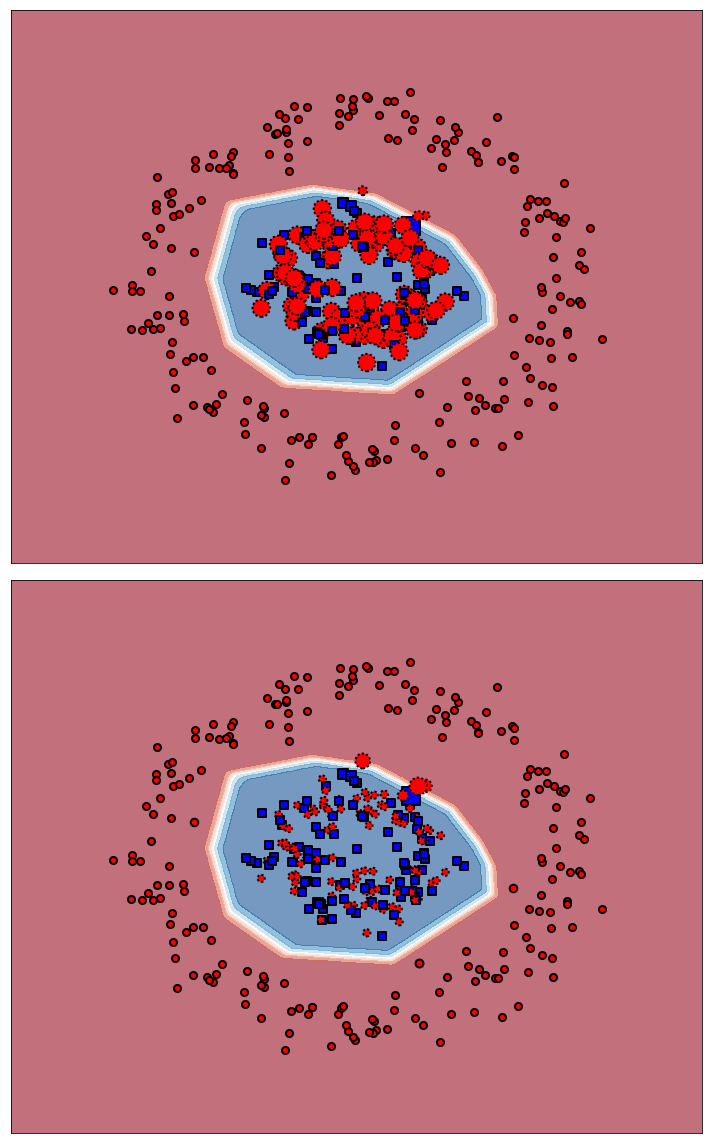

In [37]:
uelmp = UnlabelledExponentialLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=400,
                          class_weight="balanced",
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), uelmp, marker_size=["loss", "gradient"], Y_true=Y_train)

Using [ 1.          3.23157895]
Epoch: 0001 cost= 1.056876585
Epoch: 0011 cost= 0.705617562
Epoch: 0021 cost= 0.610020995
Epoch: 0031 cost= 0.494319744
Epoch: 0041 cost= 0.410170570
Epoch: 0051 cost= 0.373658955
Epoch: 0061 cost= 0.351526618
Epoch: 0071 cost= 0.339072838
Epoch: 0081 cost= 0.329607673
Epoch: 0091 cost= 0.322629541
Epoch: 0101 cost= 0.318622041
Epoch: 0111 cost= 0.314016789
Epoch: 0121 cost= 0.310750399
Epoch: 0131 cost= 0.307989828
Epoch: 0141 cost= 0.305719644
Epoch: 0151 cost= 0.304447189
Epoch: 0161 cost= 0.301749840
Epoch: 0171 cost= 0.299924277
Epoch: 0181 cost= 0.298384387
Epoch: 0191 cost= 0.297319494
Using [ 1.          3.23157895]
Using [ 1.          3.23157895]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

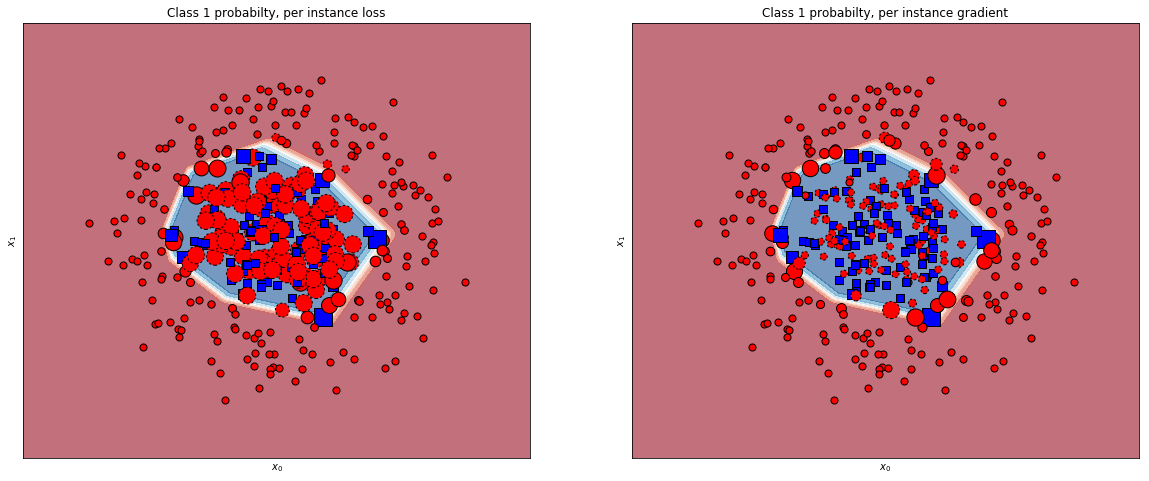

In [17]:
uelmp = UnlabelledExponentialLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), uelmp, marker_size=["loss", "gradient"], Y_true=Y_train)

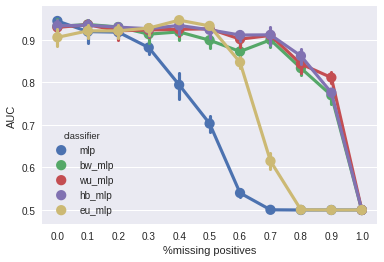

In [2]:
import seaborn as sns
import pandas as pd
%matplotlib inline

import seaborn as sns
import pandas as pd
%matplotlib inline

acc_grid = pd.read_csv('pulearn_circles.csv')

f, ax = plt.subplots(1)

data = acc_grid[acc_grid['%missing']!='%missing']

data = data.apply(pd.to_numeric, errors='ignore')

# # data = data[data['weight_u'].isin([0.3, 0.4, 0.5, 0.6])]

sns.pointplot(x='%missing', y='AUC', hue='classifier', data=data, ax=ax)
ax.set_xlabel('%missing positives')
ax.set_ylabel('AUC')